In [1]:
import anndata as ad
import scanpy as sc
import gc
import sys
import cellanova as cnova
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from metrics import calculate_metrics

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


R_HOME is already set to: /vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R


/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


# NDreamer

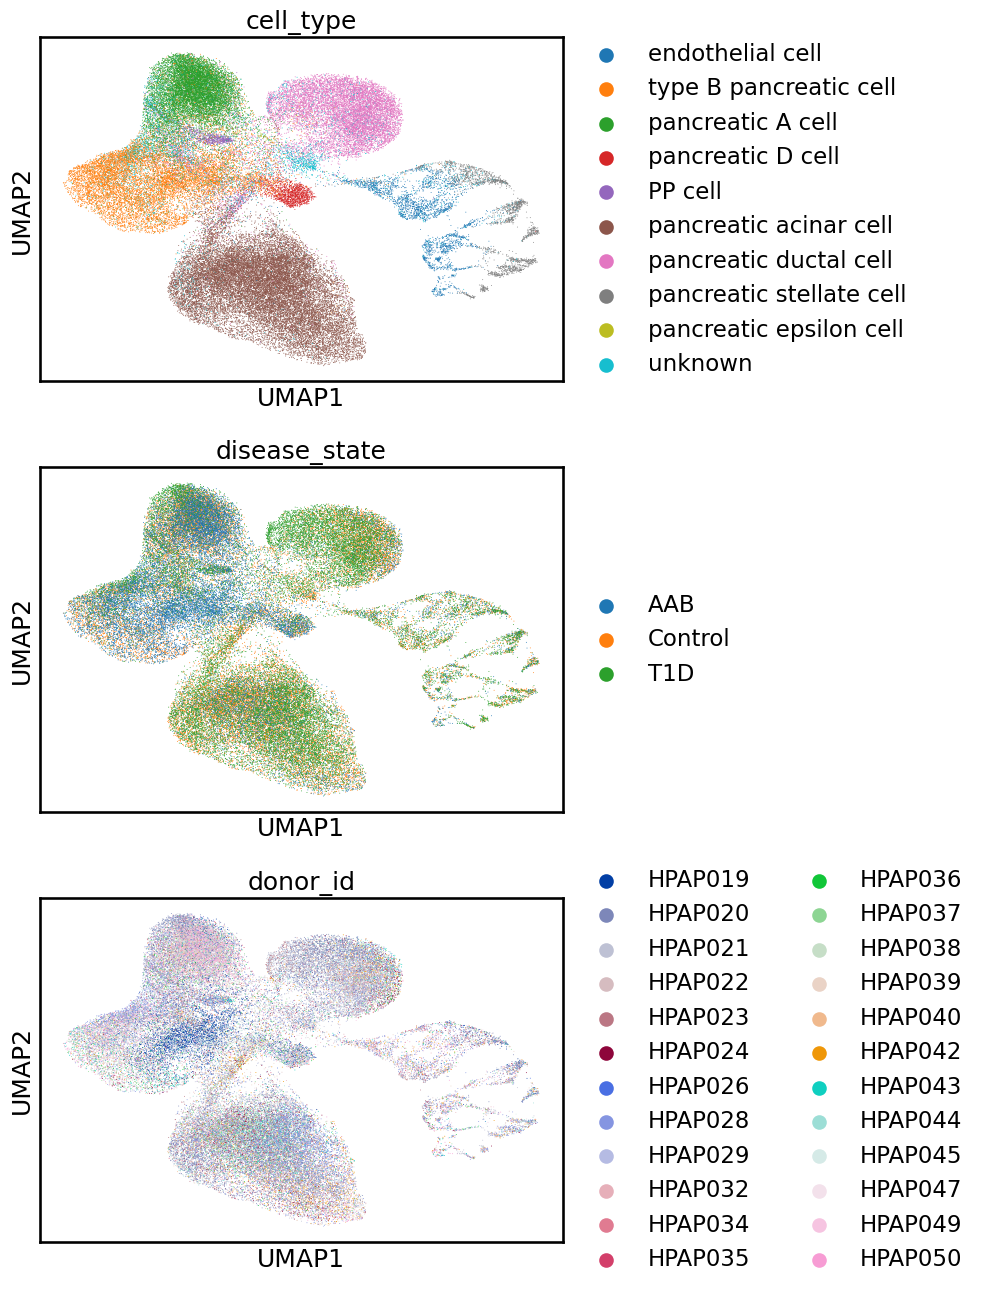

In [2]:
adata1=sc.read_h5ad("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/t1d/adata.h5ad")
main_effect_adata = ad.AnnData(adata1.obsm['X_effect_modifier_space_PCA'], dtype=np.float32)
main_effect_adata.obs = adata1.obs.copy()

if main_effect_adata.shape[1] > 60:
    sc.pp.pca(main_effect_adata)
else:
    main_effect_adata.obsm['X_pca'] = main_effect_adata.X.copy()
sc.pp.neighbors(main_effect_adata, n_neighbors=15)
sc.tl.umap(main_effect_adata)
sc.pl.umap(main_effect_adata, color=["cell_type","disease_state","donor_id"], ncols=1)

In [4]:
import os
integrated = []
for filei in os.listdir("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/t1d/"):
    if filei.find("expression.h5ad") > 0:
        integrated.append(sc.read_h5ad("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/t1d/"+ filei))
integrated = ad.concat(integrated, merge="same", uns_merge="same")

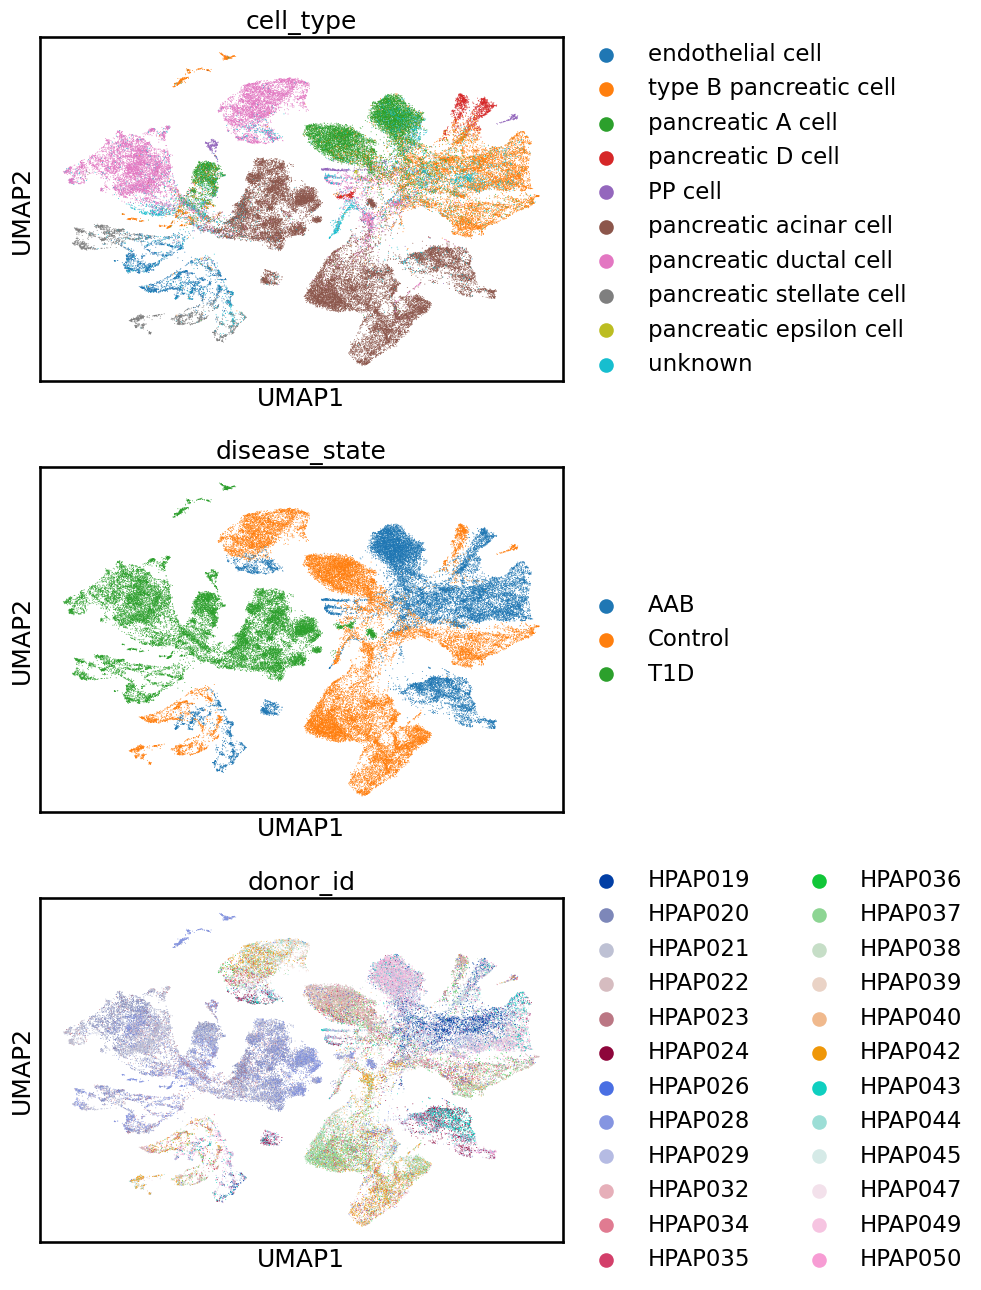

In [5]:
sc.pp.pca(integrated)
sc.pp.neighbors(integrated, n_neighbors=15)
sc.tl.umap(integrated)
sc.pl.umap(integrated, color=["cell_type","disease_state","donor_id"], ncols=1)

# cellanova

in plot_cellanova.ipynb

In [8]:
adata2=sc.read_h5ad("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/cellanova/t1d_results.h5ad")
main_effect_adata = ad.AnnData(adata2.layers['main_effect'], dtype=np.float32)
main_effect_adata.var_names = adata2.var_names
main_effect_adata.obs = adata2.obs.copy()

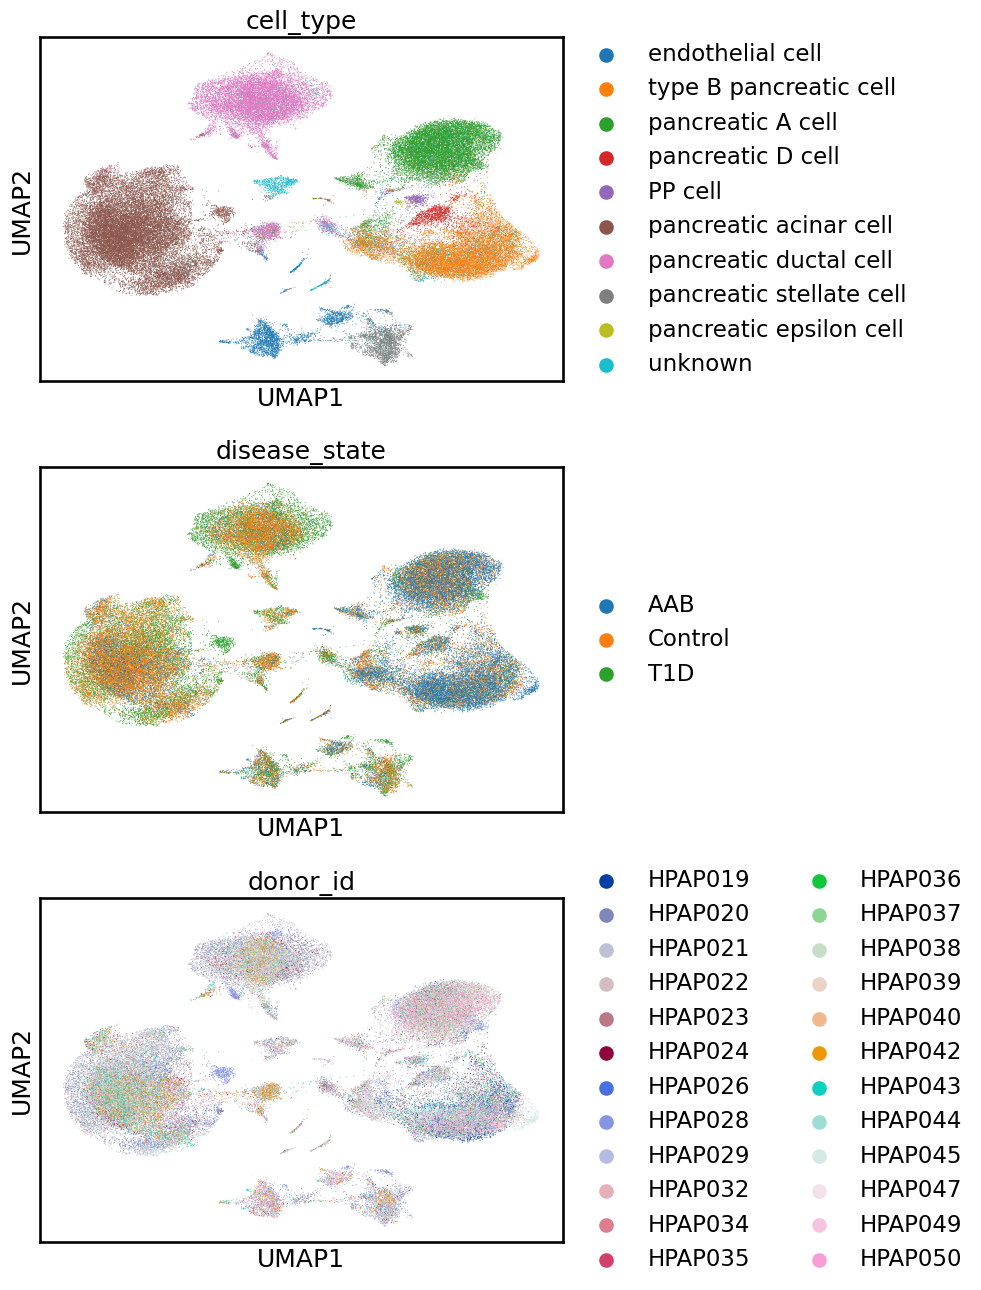

In [9]:
if main_effect_adata.shape[1] > 60:
    sc.pp.pca(main_effect_adata)
else:
    main_effect_adata.obsm['X_pca'] = main_effect_adata.X.copy()
sc.pp.neighbors(main_effect_adata, n_neighbors=15)
sc.tl.umap(main_effect_adata)
sc.pl.umap(main_effect_adata, color=["cell_type","disease_state","donor_id"], ncols=1)

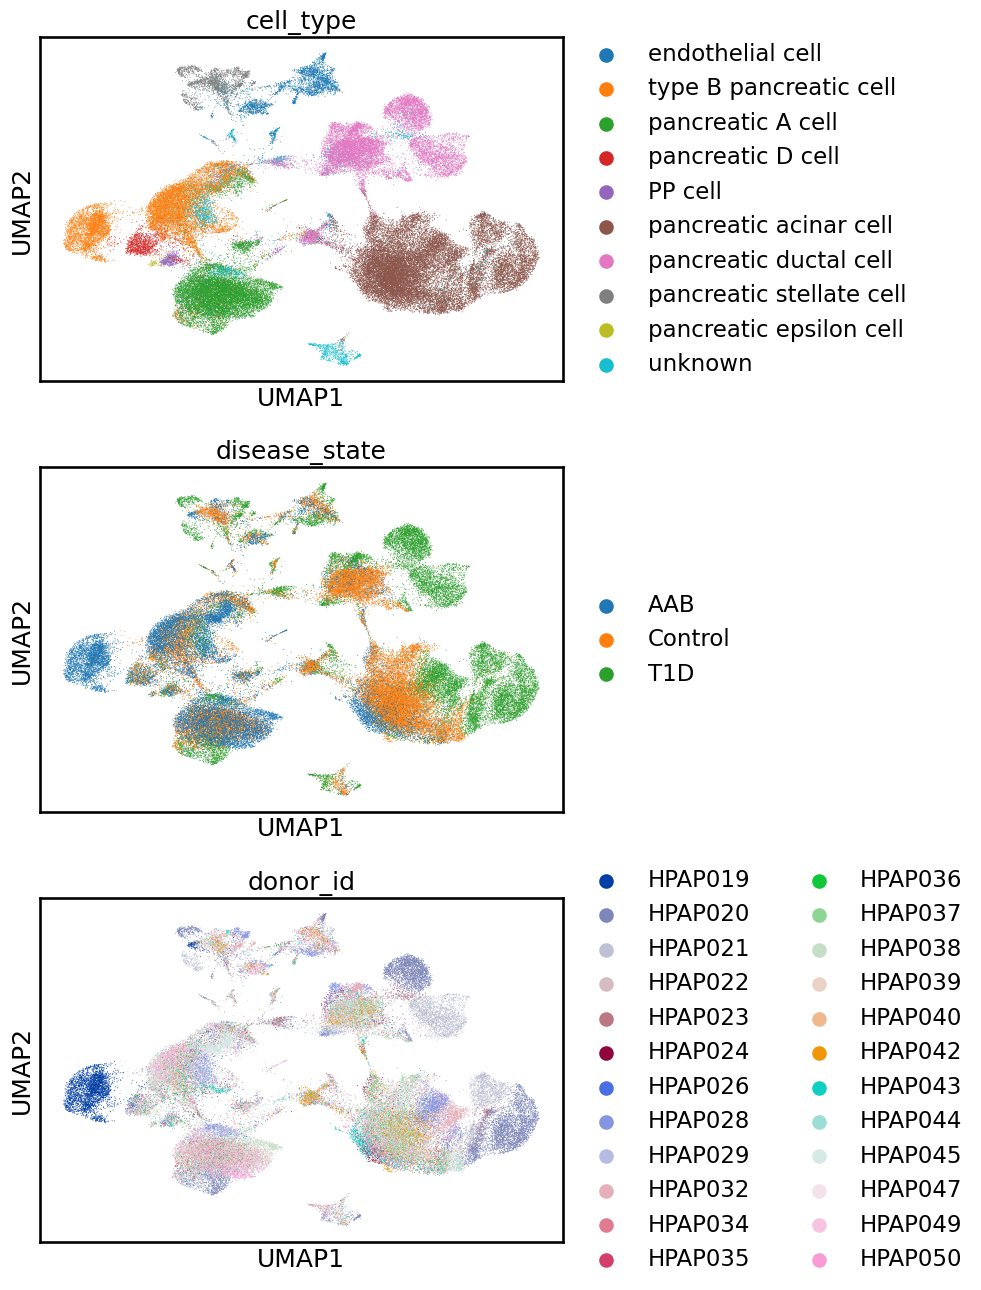

In [10]:
integrated = ad.AnnData(adata2.layers['denoised'], dtype=np.float32)
integrated.obs = adata2.obs.copy()
integrated.var_names = adata2.var_names

sc.pp.pca(integrated)
sc.pp.neighbors(integrated, n_neighbors=15)
sc.tl.umap(integrated)
sc.pl.umap(integrated, color=["cell_type","disease_state","donor_id"], ncols=1)

# scd

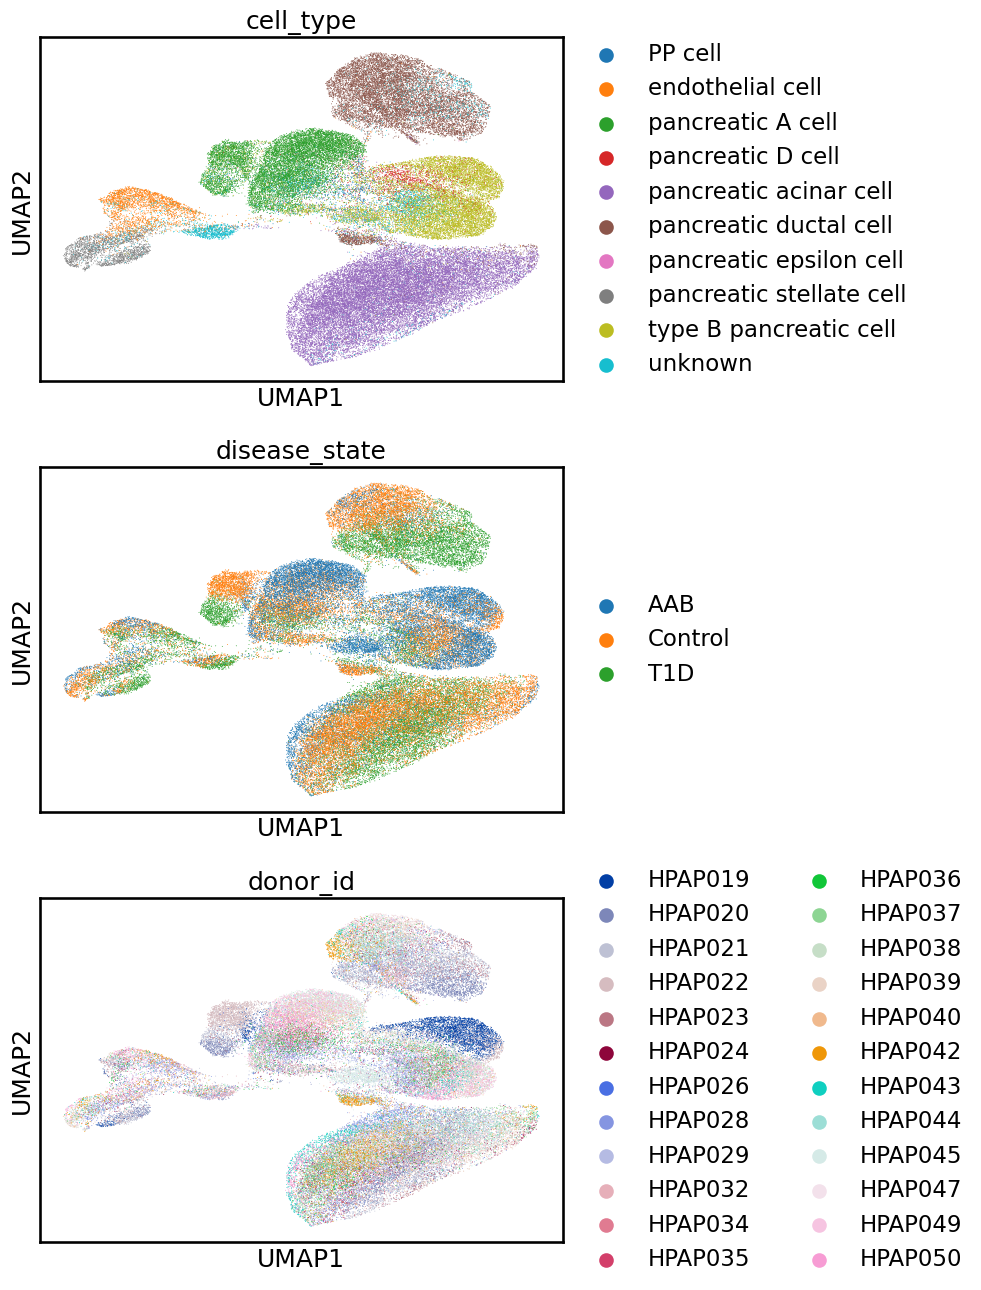

In [6]:
main_effect_adata=sc.read_h5ad("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/scd/t1d_effect_modifier_space.h5ad")
#main_effect_adata = ad.AnnData(adata1.obsm['X_effect_modifier_space_PCA'], dtype=np.float32)
#main_effect_adata.obs = adata1.obs.copy()

if main_effect_adata.shape[1] > 60:
    sc.pp.pca(main_effect_adata)
else:
    main_effect_adata.obsm['X_pca'] = main_effect_adata.X.copy()
sc.pp.neighbors(main_effect_adata, n_neighbors=15)
sc.tl.umap(main_effect_adata)
sc.pl.umap(main_effect_adata, color=["cell_type","disease_state","donor_id"], ncols=1)

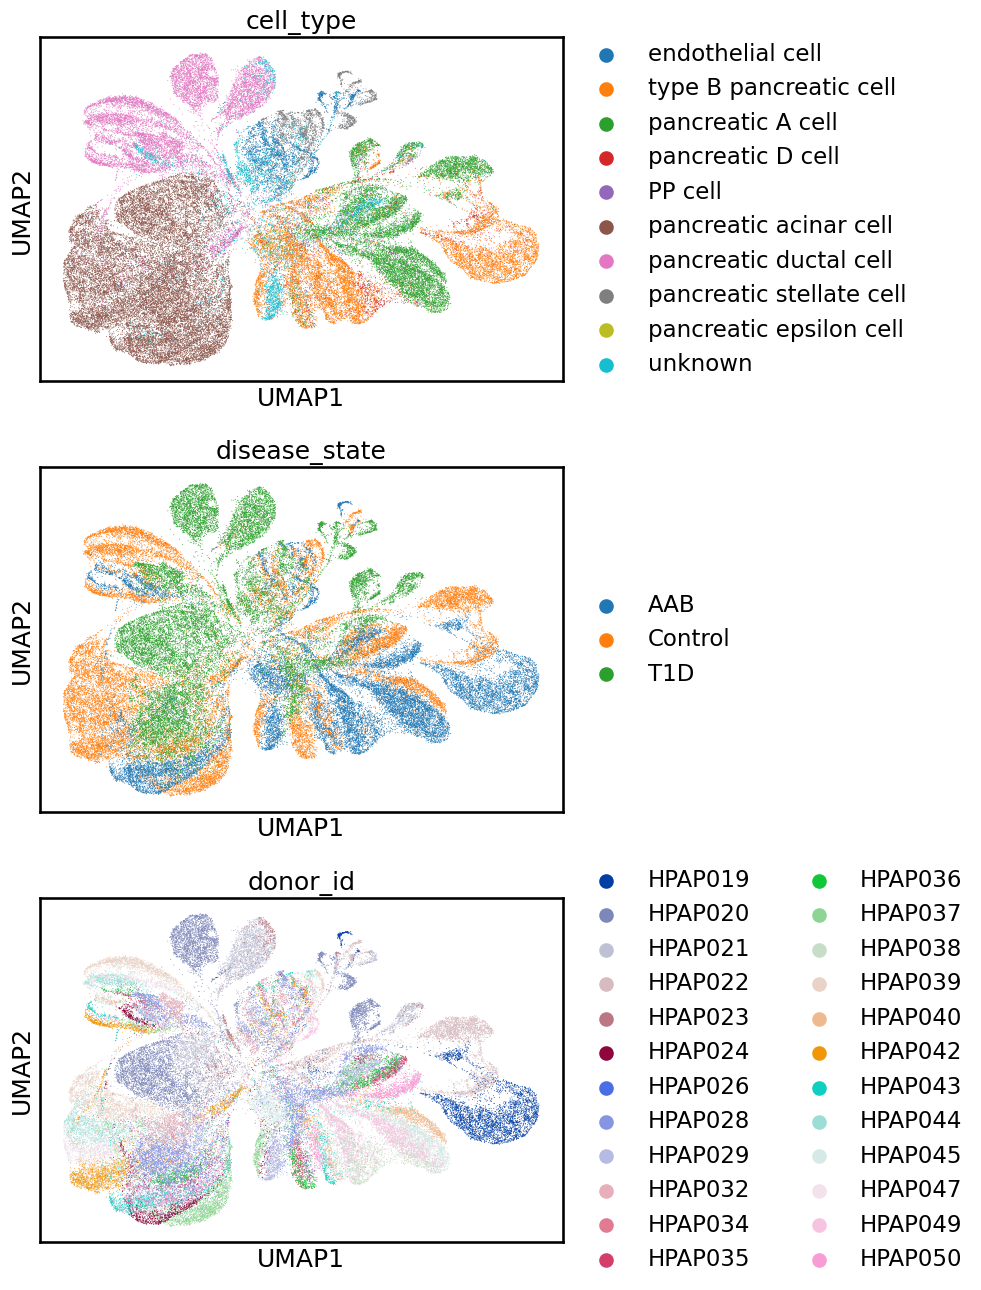

In [11]:
adata3=sc.read_h5ad("./scd/t1d_latent.h5ad")
integrated = ad.AnnData(adata3.layers['denoised'], dtype=np.float32)
integrated.obs = adata3.obs.copy()
integrated.var_names = adata3.var_names

sc.pp.pca(integrated)
sc.pp.neighbors(integrated, n_neighbors=15)
sc.tl.umap(integrated)
sc.pl.umap(integrated, color=["cell_type","disease_state","donor_id"], ncols=1)